In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/MyDrive"

/content/gdrive/MyDrive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Error Cuadratico Medio - Entrenamiento: 14.354888734622204
Error Cuadratico Medio - Prueba: 25.038860612046538


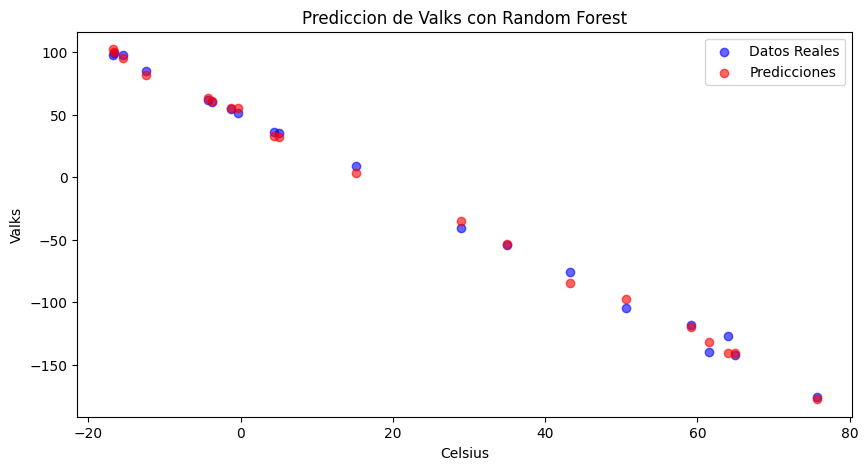

In [12]:
# Cargar los datos desde un archivo CSV
df = pd.read_csv('Valhalla23.csv')

# Separar las variables dependiente e independiente
X = df[['Celsius']]
y = df['Valks']

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de RandomForest con 200 iteraciones
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones sobre los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular el Error Cuadratico Medio (MSE) para entrenamiento y prueba
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Error Cuadratico Medio - Entrenamiento: {train_mse}")
print(f"Error Cuadratico Medio - Prueba: {test_mse}")

# Graficar las predicciones versus los valores reales
plt.figure(figsize=(10, 5))

# Grafica para el conjunto de prueba
plt.scatter(X_test, y_test, color='blue', label='Datos Reales', alpha=0.6)
plt.scatter(X_test, y_test_pred, color='red', label='Predicciones', alpha=0.6)
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Prediccion de Valks con Random Forest')
plt.legend()
plt.show()
